# Introduction

This notebook allows computation and analyses of 1-1 matching polygons between OSM and Bavaria building dataset.

In [1]:
# Import the required source files
from determine_one_to_ones import *
from analyse_distances import *
import time

# Time the execution start time
st = time.time()

dataset_1 = 'osm'
dataset_2 = 'reference'

C:\Users\banbar\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Determine the site to analyse
site_id = 'binder_test_site'

In [3]:
# 1.Finding the intersecting polygons on the given test site
# This function generates the intersections.txt file that has the following five attributes: 
#<intersection_id osm_id reference_id IoU building_type>

# show_progress = True would print out the current transaction
find_intersecting_polygons(site_id, dataset_1, dataset_2, show_progress = False)

In [4]:
# 2. Finding the candidates for 1-1 matches on both source-destination pair.
# Requires the completion of first step in both-order (i.e. osm-reference & reference-osm)
# This function identifies the unique osm ids and reference ids, and store them under the candidates dictionary.
# candidates['dataset_1'] stores the candidate ids in the dataset_1
# candidates['dataset_2'] stores the candidate ids in the dataset_2

candidates = identify_candidate_buildings(site_id)

In [5]:
# 3. Obtain 1-1s. 
# In the candidates, there may still be 1-n matches. 
# This function enables the detection of 1-1 matches.
# Output is recorded in the file:  one_to_ones.txt
#<intersection_id osm_id reference_id IoU building_type>
identify_one_to_ones(site_id, candidates)

Total 1-1s:  181


In [6]:
# 4. Selecting the 1-1 polygons on QGIS - for visual purpose and ease computation. 
# The reversing of source & destination should not change the content:
export_one_to_ones(site_id, 'gid')

In [7]:
# 5. Distance computation between matching georeferenced polygons
compute_distances(site_id, show_progress = False)
# Saves the file in results.txt which has the following attributes:
#<id osm_gid ref_gid b_type iou hausdorff chamfer polis tf>

In [8]:
# Find the ranks - investigate the polygons having the top-k rank differences
obtain_ranked_distances(site_id, distance_measures=['hausdorff', 'chamfer']) # creates the results_ranked_sorted.txt file
# Optional input: distance_measures: The rank difference between two input distance measures 

# The .txt file without the distance_measures input has the following attributes:
#<id osm_gid ref_gid iou r_h r_c r_p r_tf r_difference>

# The .txt file with the distance_measures input has the following attributes:
#<id osm_gid ref_gid iou r_h r_c r_p r_tf r_difference ds1_ds2> # ds1_ds2 is the rank difference between the selected distance measures

heatmap_ranked_distances(site_id)

G:\My Drive\Publications\x2polygons_IJGIS_GEAN_EPB\v4_CEUS\osm_vs_bavaria\analyse_distances.py:424: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(centroids_out)


Pearson correlation:  [[1.         0.78012268]
 [0.78012268 1.        ]]


0.7801226768254486

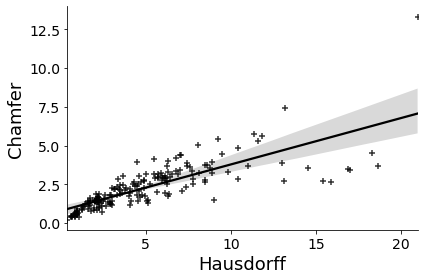

In [9]:
# 6. Investigate correlation between distance measures
# 6.1. Scatter plot of two measures
# Distance measures: ['hausdorff', 'chamfer', 'polis', 'turn_function']
# The resulting scatter plot is also saved under the site_id directory
d1 = 'hausdorff'
d2 = 'chamfer'
correlation_between_distance_measures(site_id, d1, d2, plot = True)

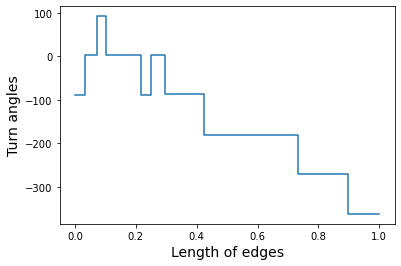

In [10]:
# Plotting the turn function of a polygon
from x2polygons.polygon_distance import *
from x2polygons.plot import *

script_dir= os.getcwd()
site_path = site_id + '/'
data_path = os.path.join(script_dir, site_path, 'matched_reference.shp')
data = dict()
data['reference'] = gpd.read_file(data_path)
#obtain the polygon with a given gid
target_gid = 104131

# Filter the GeoDataFrame to obtain the polygon with the specified GID
target_polygon = data['reference'][data['reference']['gid'] == target_gid]

type(target_polygon.geometry)
from shapely.ops import unary_union
merged_polygon = unary_union(target_polygon.geometry)
#print(merged_polygon)
plot_turning_function(turning_function(merged_polygon))

Pearson correlation:  [[1.         0.78012268]
 [0.78012268 1.        ]]


0.7801226768254486

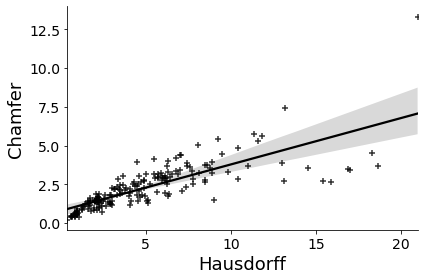

In [11]:
d1 = 'hausdorff'
d2 = 'chamfer'
correlation_between_distance_measures(site_id, d1, d2, plot = True)

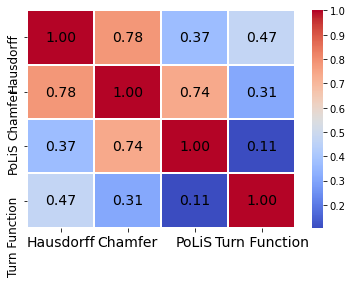

In [12]:
# 6. Investigate correlation between distance measures
# 6.2. Obtain the cross-correlation between all distance measures
d1 = ['hausdorff', 'chamfer', 'polis', 'turn_function']
d2 = ['hausdorff', 'chamfer', 'polis', 'turn_function']

corr = np.zeros((len(d1), len(d2)))

# Fill the correlation matrix with correlation values
for i, measure1 in enumerate(d1):
    for j, measure2 in enumerate(d2):
        corr[i, j] = correlation_between_distance_measures(site_id, measure1, measure2, plot = False)
        #print(measure1, measure2, corr[i, j])

# Produce the correlation heatmap
correlation_heatmap(site_id, corr)


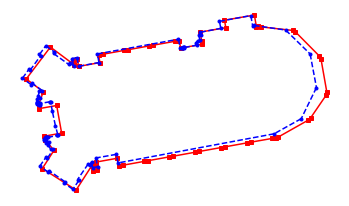

In [15]:
# Visualise a sample matching case 
p_osm = 219618
p_reference = 79054

visualise_matching_polygons(site_id, p_osm, p_reference)

# If Inskscape is installed, the figure could be exported as emf for vector graphics
#visualise_matching_polygons(site_id, p_osm, p_reference, export_as_emf = True)


In [14]:
# Record the execution time
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time/60, 'minutes')

Execution time: 24.276746567090353 minutes
